# Accessing and Modifying pixel values

In [30]:
import numpy as np
import cv2 as cv

img = cv.imread('./sample_image.jpg')
assert img is not None, "file not found"

Access a pixel value by its row and column coordinates. For BGR image, it returns and array of Blue, Green, Red values. For grayscale image, corresponding intensity is returned.

In [31]:
px = img[100, 100]
print(px)

[77 57 39]


In [32]:
img[100, 100] = [157, 166, 200]
print(img[100, 100])

[157 166 200]


## Accessing image properties

The number of rows, columns, and channels.

In [33]:
print(img.shape)

(1024, 1024, 3)


Total number of pixels.

In [34]:
print(img.size)

3145728


Image datatype.

In [35]:
print(img.dtype)

uint8


## Image ROI

이미지의 일부 구역을 지정해 조작하는 연산

In [37]:
area = img[280:800, 330:1000]
img[0:520, 0:670] = area

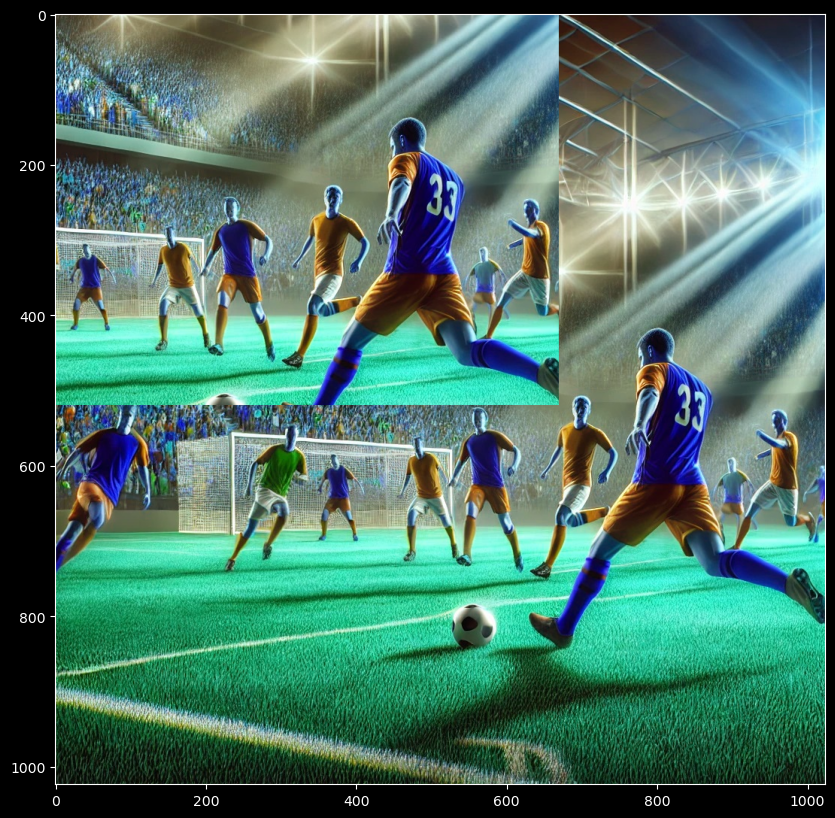

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

# Splitting and Merging Image Channels

Sometimes you will need to work separately on the B, G, R channels of and image.

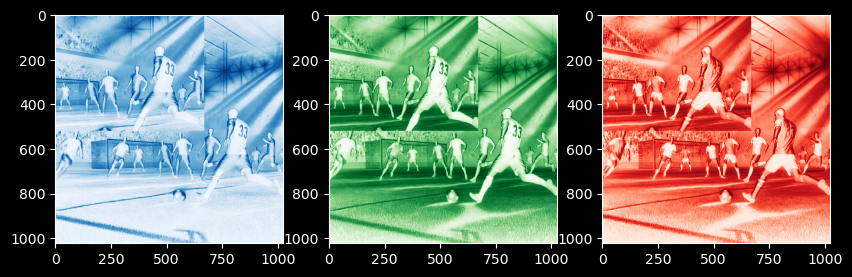

In [48]:
b, g, r = cv.split(img)

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(b, cmap='Blues')
plt.subplot(132)
plt.imshow(g, cmap='Greens')
plt.subplot(133)
plt.imshow(r, cmap='Reds')
plt.show()

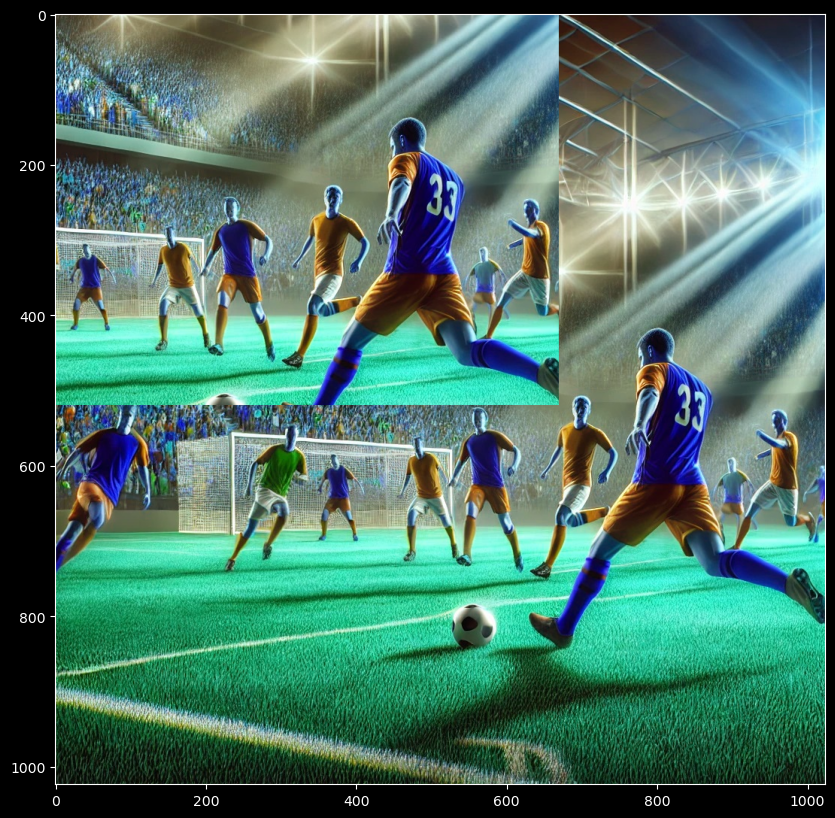

In [49]:
img = cv.merge((b, g, r))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

Or:

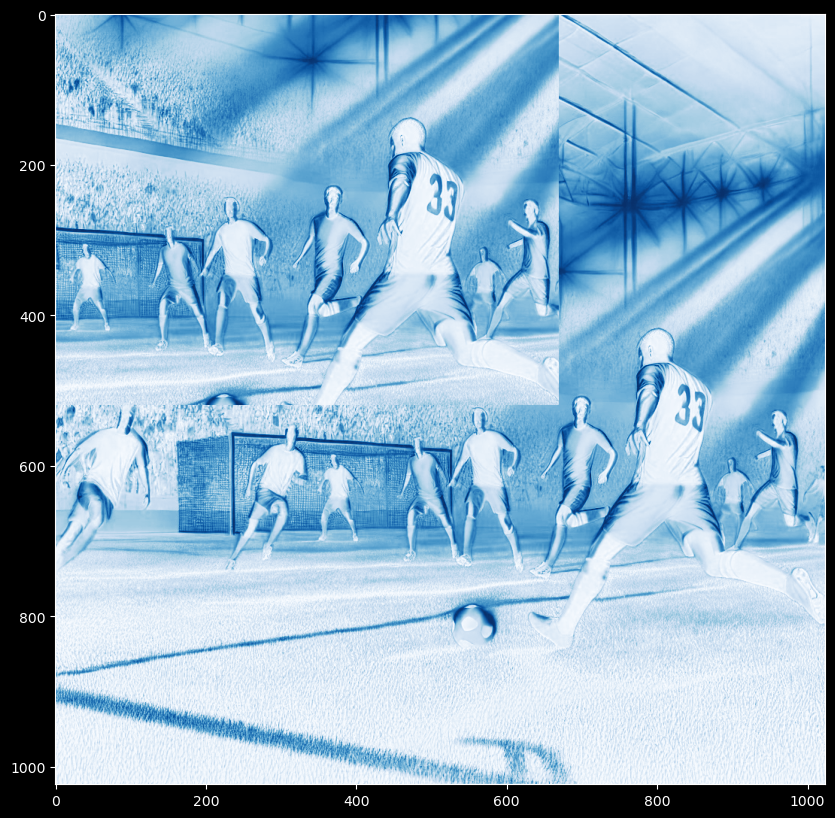

In [50]:
b = img[:, :, 0]

plt.figure(figsize=(10, 10))
plt.imshow(b, cmap='Blues')
plt.show()

# Padding

`cv.copyMakeBorder` is used to create a border around the image like a photo frame. It is mainly used for padding purposes. `cv.copyMakeBorder` takes the following arguments:

- **src**: input image
- **top, bottom, left, right**: border width in number of pixels in corresponding directions.
- **brderType**: Flag defining what kind of border to be added. It can be following types.
    - `cv.BORDER_CONSTANT`: Adds a constant border color.
    - `cv.BORDER_REFLECT`: Border will be mirror reflection of the border elements. like this : fedcba|abcdefgh|hgfedcb
    - `cv.BORDER_REFLECT_101` or `cv.BORDER_DEFAULT`: Same as above, but with a slight change.
    - `cv.BORDER_REPLICATE`: Last element in an image is replcated throughout.
    - `cv.BORDER_WRAP`:  Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
- **value**: Color of border if border type is `cv.BORDER_CONSTANT`.

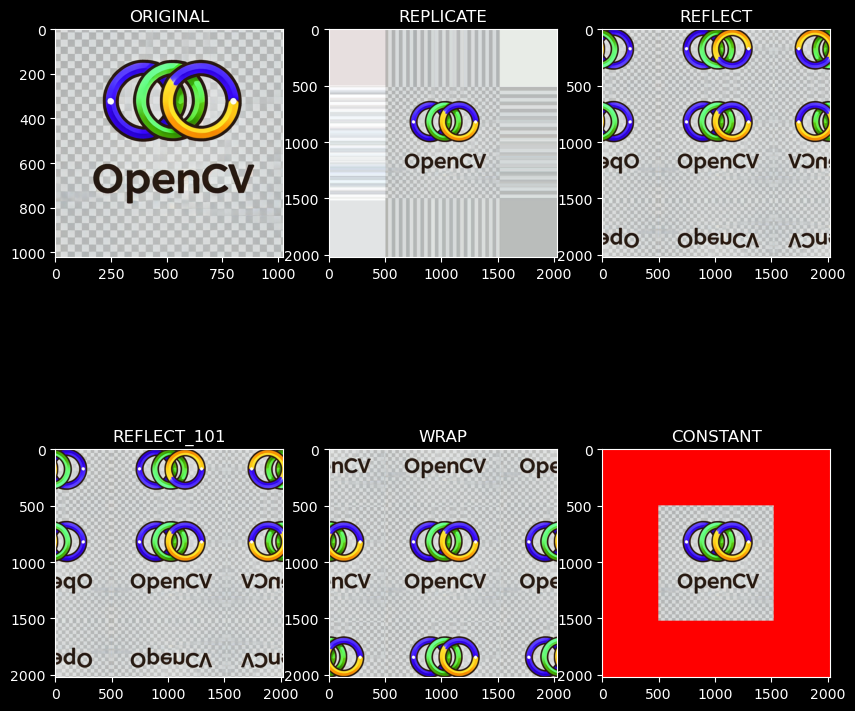

In [55]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255, 0, 0]
pad_size = 500

img1 = cv.imread('./opencv_logo.jpg')
assert img1 is not None, "file not found"

replicate = cv.copyMakeBorder(img1, *(pad_size for _ in range(4)), cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, *(pad_size for _ in range(4)), cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, *(pad_size for _ in range(4)), cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1, *(pad_size for _ in range(4)), cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img1, *(pad_size for _ in range(4)), cv.BORDER_CONSTANT, value=BLUE)

plt.figure(figsize=(10, 10))
plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.show()